# Actividad 3: Data augmenting and early stopping

Samuel Alejandro Diaz del Guante Ochoa - A01637592

## Instructions

Solve the following exercises individually in a Jupyter notebook and answer the questions indicated in each one.

You will use the Cat and Dog Dataset.

Goal: Build 3 different convolutional models using the same dataset.

In [1]:
# Import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

* Make a description about the dataset:
    * **What is the dataset about?**<br>
    The dataset is divided by two classes of images representing various types of cats and dogs. At the same time the dataset is split between a train sample which will be used to fit the models, a test that will help us evaluate and score the model loss and accuracy and finally a validation set that will be used in the model fitting step to gain insight like if the model is overfitting.

    * **Also describes the following characteristics: number of classes, number of samples, how the samples are split, sample size, value type.**<br>
    The training dataset contains 2000 images (0.496), the test dataset 1030 (0.255) and the validation dataset 1000 images (0.248). All datasets a equally divided by the same amount of each class. Each sample image seems to have a different size but tensorflow accomodates this issue. The object in which the images are stored divides the total load in many batches (by default 32) and each batch contains the array representation of the image and the label it was assigned.

In [2]:
img_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

print('Train dataset')
train_dataset = img_generator.flow_from_directory('cats_and_dogs_small/train')
print('Test dataset')
test_dataset = img_generator.flow_from_directory('cats_and_dogs_small/test')
print('Validation dataset')
validation_dataset = img_generator.flow_from_directory('cats_and_dogs_small/validation')

Train dataset
Found 2000 images belonging to 2 classes.
Test dataset
Found 1030 images belonging to 2 classes.
Validation dataset
Found 1000 images belonging to 2 classes.


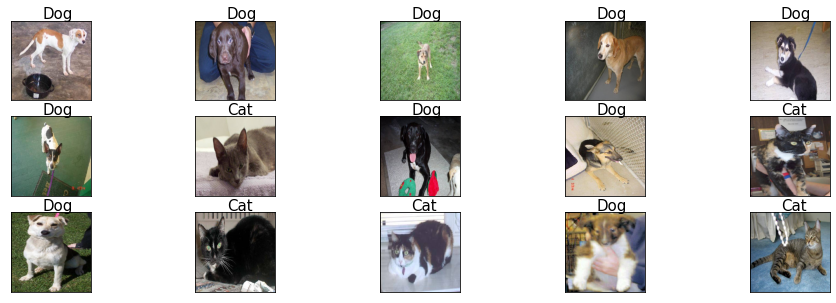

In [3]:
labels = {0:'Cat', 1:'Dog'}
rand1 = random.sample(range(63), 15)
rand2 = random.sample(range(32), 15)

fig, axes = plt.subplots(3, 5, figsize=(16, 5))
j = 0

for i in range(15):
    axes[i//5, j].imshow(train_dataset[rand1[i]][0][rand2[i]], cmap=plt.cm.binary)
    axes[i//5, j].get_xaxis().set_visible(False)
    axes[i//5, j].get_yaxis().set_visible(False)
    axes[i//5, j].text(100, -5, labels[np.where(train_dataset[rand1[i]][1][rand2[i]] == 1)[0][0]], fontsize=15)
    j = j+1 if j+1<5 else 0

plt.show()

* Build CNN model without Data Augmenting technique and using tensorflow and Keras API. Define hyperparameters:
    * Number of Convolutional Layers
    * Kernel Size
    * Strides
    * Function Activation
    * Outputs
    * Use accuracy as evaluation metric

In [188]:
# Create model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [189]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [190]:
# Fit model
res = model.fit(train_dataset, validation_data=validation_dataset, epochs=10)

Epoch 1/10
63/63 [==============================] - 71s 1s/step - loss: 1.8685 - accuracy: 0.5560 - val_loss: 0.6582 - val_accuracy: 0.5970
Epoch 2/10
63/63 [==============================] - 65s 1s/step - loss: 0.5870 - accuracy: 0.7030 - val_loss: 0.6983 - val_accuracy: 0.5990
Epoch 3/10
63/63 [==============================] - 64s 1s/step - loss: 0.4663 - accuracy: 0.7870 - val_loss: 0.7304 - val_accuracy: 0.6140
Epoch 4/10
63/63 [==============================] - 64s 1s/step - loss: 0.2989 - accuracy: 0.8890 - val_loss: 0.6778 - val_accuracy: 0.6900
Epoch 5/10
63/63 [==============================] - 64s 1s/step - loss: 0.1519 - accuracy: 0.9540 - val_loss: 0.8672 - val_accuracy: 0.6390
Epoch 6/10
63/63 [==============================] - 63s 1s/step - loss: 0.0730 - accuracy: 0.9855 - val_loss: 0.8547 - val_accuracy: 0.6700
Epoch 7/10
63/63 [==============================] - 64s 1s/step - loss: 0.0261 - accuracy: 0.9980 - val_loss: 0.9407 - val_accuracy: 0.6780
Epoch 8/10
63/63 [==

In [191]:
# Plot learning curves
df = pd.DataFrame(res.history)
df

,loss,accuracy,val_loss,val_accuracy
0,1.868513,0.5560,0.658242,0.597
1,0.586970,0.7030,0.698321,0.599
2,0.466254,0.7870,0.730377,0.614
3,0.298854,0.8890,0.677760,0.690
4,0.151914,0.9540,0.867160,0.639
5,0.072984,0.9855,0.854697,0.670
6,0.026133,0.9980,0.940671,0.678
7,0.011728,0.9995,1.048277,0.674
8,0.005245,1.0000,1.081869,0.668
9,0.003501,1.0000,1.172834,0.666


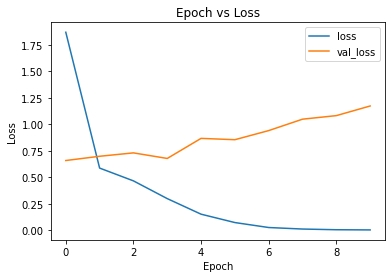

In [192]:
plt.plot(res.epoch, df.loss, label='loss')
plt.plot(res.epoch, df.val_loss, label='val_loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

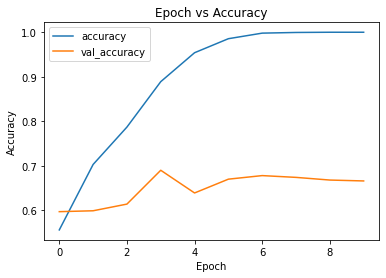

In [193]:
plt.plot(res.epoch, df.accuracy, label='accuracy')
plt.plot(res.epoch, df.val_accuracy, label='val_accuracy')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [194]:
# Evaluate model
(test_loss, test_accuracy) = model.evaluate(test_dataset)
print("Loss:", test_loss)
print('Accuracy', test_accuracy)

33/33 [==============================] - 8s 244ms/step - loss: 1.1442 - accuracy: 0.6699
Loss: 1.1441863775253296
Accuracy 0.6699029207229614


* Build CNN model with Data Augmenting technique and using the same previous CNN architecture.
    * Define Data augmenting parameters
    * Plot data augmented images from single image
    * Use accuracy as evaluation metric

In [2]:
train_img_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                      shear_range=0.4,
                                                                      zoom_range=0.4,
                                                                      horizontal_flip=True)
print('Train dataset')
train_dataset = train_img_generator.flow_from_directory('cats_and_dogs_small/train')

test_img_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
print('Test dataset')
test_dataset = test_img_generator.flow_from_directory('cats_and_dogs_small/test')
print('Validation dataset')
validation_dataset = test_img_generator.flow_from_directory('cats_and_dogs_small/validation')

Train dataset
Found 2000 images belonging to 2 classes.
Test dataset
Found 1030 images belonging to 2 classes.
Validation dataset
Found 1000 images belonging to 2 classes.


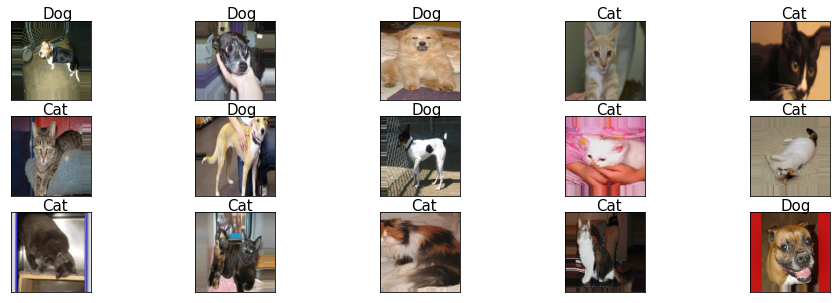

In [3]:
labels = {0:'Cat', 1:'Dog'}
rand1 = random.sample(range(63), 15)
rand2 = random.sample(range(32), 15)

fig, axes = plt.subplots(3, 5, figsize=(16, 5))
j = 0

for i in range(15):
    axes[i//5, j].imshow(train_dataset[rand1[i]][0][rand2[i]], cmap=plt.cm.binary)
    axes[i//5, j].get_xaxis().set_visible(False)
    axes[i//5, j].get_yaxis().set_visible(False)
    axes[i//5, j].text(100, -5, labels[np.where(train_dataset[rand1[i]][1][rand2[i]] == 1)[0][0]], fontsize=15)
    j = j+1 if j+1<5 else 0

plt.show()

In [4]:
# Create model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [5]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Fit model
res = model.fit(train_dataset, validation_data=validation_dataset, epochs=10)

Epoch 1/10
63/63 [==============================] - 79s 1s/step - loss: 1.2009 - accuracy: 0.5615 - val_loss: 0.6960 - val_accuracy: 0.5770
Epoch 2/10
63/63 [==============================] - 82s 1s/step - loss: 0.6347 - accuracy: 0.6405 - val_loss: 0.6217 - val_accuracy: 0.6720
Epoch 3/10
63/63 [==============================] - 76s 1s/step - loss: 0.6137 - accuracy: 0.6730 - val_loss: 0.6229 - val_accuracy: 0.6710
Epoch 4/10
63/63 [==============================] - 76s 1s/step - loss: 0.6059 - accuracy: 0.6665 - val_loss: 0.6269 - val_accuracy: 0.6680
Epoch 5/10
63/63 [==============================] - 76s 1s/step - loss: 0.6049 - accuracy: 0.6625 - val_loss: 0.6034 - val_accuracy: 0.6880
Epoch 6/10
63/63 [==============================] - 76s 1s/step - loss: 0.6146 - accuracy: 0.6705 - val_loss: 0.6135 - val_accuracy: 0.6590
Epoch 7/10
63/63 [==============================] - 77s 1s/step - loss: 0.6086 - accuracy: 0.6725 - val_loss: 0.5983 - val_accuracy: 0.6790
Epoch 8/10
63/63 [==

In [7]:
# Plot learning curves
df = pd.DataFrame(res.history)
df

,loss,accuracy,val_loss,val_accuracy
0,1.200906,0.5615,0.695988,0.577
1,0.634691,0.6405,0.621731,0.672
2,0.613734,0.6730,0.622908,0.671
3,0.605913,0.6665,0.626922,0.668
4,0.604876,0.6625,0.603439,0.688
5,0.614564,0.6705,0.613513,0.659
6,0.608625,0.6725,0.598273,0.679
7,0.581083,0.6990,0.614726,0.664
8,0.582313,0.6745,0.604780,0.679
9,0.576134,0.6960,0.610350,0.679


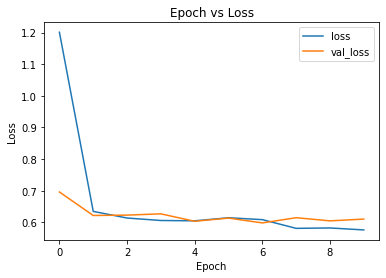

In [8]:
plt.plot(res.epoch, df.loss, label='loss')
plt.plot(res.epoch, df.val_loss, label='val_loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

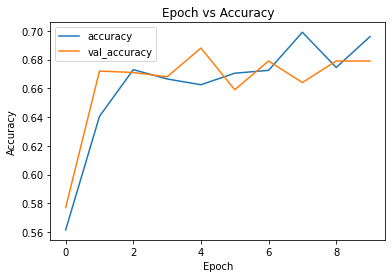

In [9]:
plt.plot(res.epoch, df.accuracy, label='accuracy')
plt.plot(res.epoch, df.val_accuracy, label='val_accuracy')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
# Evaluate model
(test_loss, test_accuracy) = model.evaluate(test_dataset)
print("Loss:", test_loss)
print('Accuracy', test_accuracy)

33/33 [==============================] - 15s 464ms/step - loss: 0.6544 - accuracy: 0.6544
Loss: 0.6544238328933716
Accuracy 0.6543689370155334


* Build CNN model with Data Augmenting and Early stopping techniques and using the same previous CNN architecture.
    * Use accuracy as evaluation metric
    * Define Data augmenting parameters
    * Define Early stopping settings

In [11]:
train_img_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                      shear_range=0.4,
                                                                      zoom_range=0.4,
                                                                      horizontal_flip=True)
print('Train dataset')
train_dataset = train_img_generator.flow_from_directory('cats_and_dogs_small/train')

test_img_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
print('Test dataset')
test_dataset = test_img_generator.flow_from_directory('cats_and_dogs_small/test')
print('Validation dataset')
validation_dataset = test_img_generator.flow_from_directory('cats_and_dogs_small/validation')

Train dataset
Found 2000 images belonging to 2 classes.
Test dataset
Found 1030 images belonging to 2 classes.
Validation dataset
Found 1000 images belonging to 2 classes.


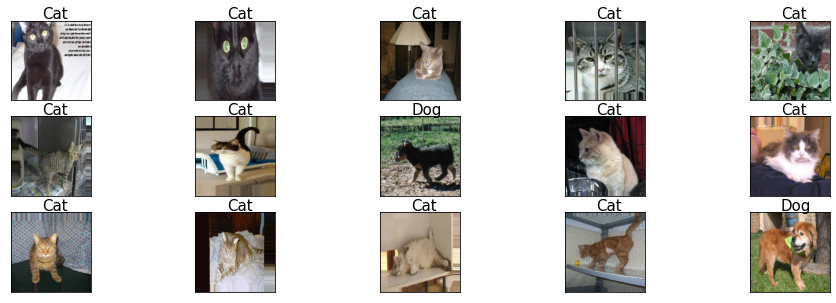

In [12]:
labels = {0:'Cat', 1:'Dog'}
rand1 = random.sample(range(63), 15)
rand2 = random.sample(range(32), 15)

fig, axes = plt.subplots(3, 5, figsize=(16, 5))
j = 0

for i in range(15):
    axes[i//5, j].imshow(train_dataset[rand1[i]][0][rand2[i]], cmap=plt.cm.binary)
    axes[i//5, j].get_xaxis().set_visible(False)
    axes[i//5, j].get_yaxis().set_visible(False)
    axes[i//5, j].text(100, -5, labels[np.where(train_dataset[rand1[i]][1][rand2[i]] == 1)[0][0]], fontsize=15)
    j = j+1 if j+1<5 else 0

plt.show()

In [27]:
# Create model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [28]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
# Fit model
earlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.01,
    patience=3,
    verbose=1,
    mode="max",
    restore_best_weights=True,
)

res = model.fit(train_dataset, validation_data=validation_dataset, epochs=10, callbacks=earlyStopping)

Epoch 1/10
63/63 [==============================] - 101s 2s/step - loss: 2.4338 - accuracy: 0.4945 - val_loss: 0.7145 - val_accuracy: 0.5060
Epoch 2/10
63/63 [==============================] - 84s 1s/step - loss: 0.6588 - accuracy: 0.5965 - val_loss: 0.6575 - val_accuracy: 0.6090
Epoch 3/10
63/63 [==============================] - 85s 1s/step - loss: 0.6432 - accuracy: 0.6390 - val_loss: 0.6311 - val_accuracy: 0.6540
Epoch 4/10
63/63 [==============================] - 84s 1s/step - loss: 0.6178 - accuracy: 0.6545 - val_loss: 0.6045 - val_accuracy: 0.6660
Epoch 5/10
63/63 [==============================] - 84s 1s/step - loss: 0.6021 - accuracy: 0.6715 - val_loss: 0.5860 - val_accuracy: 0.6730
Epoch 6/10
63/63 [==============================] - 85s 1s/step - loss: 0.6037 - accuracy: 0.6655 - val_loss: 0.5997 - val_accuracy: 0.6720
Epoch 7/10
63/63 [==============================] - 84s 1s/step - loss: 0.6036 - accuracy: 0.6800 - val_loss: 0.5999 - val_accuracy: 0.6720
Epoch 7: early stop

In [30]:
# Plot learning curves
df = pd.DataFrame(res.history)
df

,loss,accuracy,val_loss,val_accuracy
0,2.433849,0.4945,0.714493,0.506
1,0.658799,0.5965,0.657498,0.609
2,0.643182,0.6390,0.631073,0.654
3,0.617763,0.6545,0.604451,0.666
4,0.602116,0.6715,0.586042,0.673
5,0.603742,0.6655,0.599699,0.672
6,0.603594,0.6800,0.599860,0.672


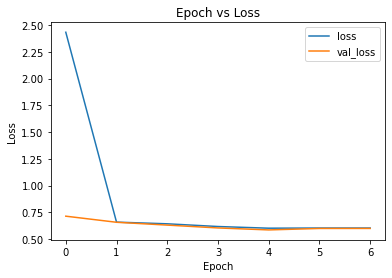

In [31]:
plt.plot(res.epoch, df.loss, label='loss')
plt.plot(res.epoch, df.val_loss, label='val_loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

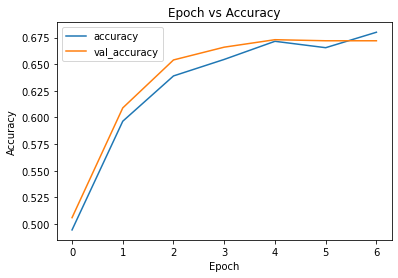

In [32]:
plt.plot(res.epoch, df.accuracy, label='accuracy')
plt.plot(res.epoch, df.val_accuracy, label='val_accuracy')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
# Evaluate model
(test_loss, test_accuracy) = model.evaluate(test_dataset)
print("Loss:", test_loss)
print('Accuracy', test_accuracy)

33/33 [==============================] - 12s 368ms/step - loss: 0.6091 - accuracy: 0.6738
Loss: 0.6090958118438721
Accuracy 0.6737864017486572


* **Report the accuracy for each model. Which was the highest? Why?**<br>
    With the current CNN inplace, the training accuaracy scores were wildly diferent. The first model reaching a 100% accuracy while the other two stayed around the 70-75%. However, the test accuracy scores across all three variations ranged from 65-70%. One reason why the first regular instance of the model reached so high score in the training phase while not so much in testing might be because it was overfitting and not generalizing and picking up characteristics as well as the others.

* **Report the training and validation loss. Which was the lowest? Why?**<br>
    Consistently the first model without data augmentation and callback functions did the worst in the validation metrics. You can clearly see this in each epoch, validation loss went down at first but increased after a set number of epochs (usually four). Training loss continued to decrease but, just like its accuracy, it cannot be trusted and should be double checked with testing scores. Adding to this, the models which used data augmentation and callbacks kept a steady loss value between epochs, was aligned with the test loss and was much lower than the first model loss, ~0.60 and ~1.15 respectively.

* **How many epochs were made using early stopping? How does this affect performance and training time?**<br>
    The max amount of epochs used in each model was 10 but with the present hyperparameters it was usually stopped at 7 epochs restoring the best state of the model. Depending of hardware and time constrains it can be a saving grace because it can drastically reduce the time it takes to train the model without sacrificing too much the effectiveness of the model.

* **Make a conclusion about the task you have done.**<br>
    Data augmentation and callback functions are valuable techniques that I will add to my toolkit moving forward when building machine learning models. Data augmentation can be useful to prevent overfitting by introducing random noise or variation to the training dataset without breaking the the distribution or logic of the data and to help the model is identify the characteristics it should learn to generalize properly. Callbacks also help minimize overfitting occurances, for example, by halting the model before it happens. There are a good amount of callback functions and parameters that can help optimize the model potential and reduce time and resource consumption without compromising on model accuracy.